In [1]:
# %display latex

In [2]:
from IPython.display import display, Math, Latex

In [3]:
kappa = var("kappa")

z = var("z")
rh = var("rho")
ph = var("varphi")

c = var("c")
omega = var("omega")

h = var("h")
a = var("a")

m = var("m")
psi_m = var("psi_m")

assume(kappa, "real")
assume(kappa > 0)

assume(z, "real")
assume(rh, "real")
assume(rh > 0)
assume(ph, "real")

assume(c, "real")
assume(c > 0)
assume(omega, "real")
assume(omega > 0)

assume(h, "real")
assume(h > 0)
assume(a, "real")
assume(a > 0)

assume(m, "real")
assume(m >= 0)
assume(psi_m, "real")

m_val = 0
n_val = 0
h_val = 0

a_val = 12

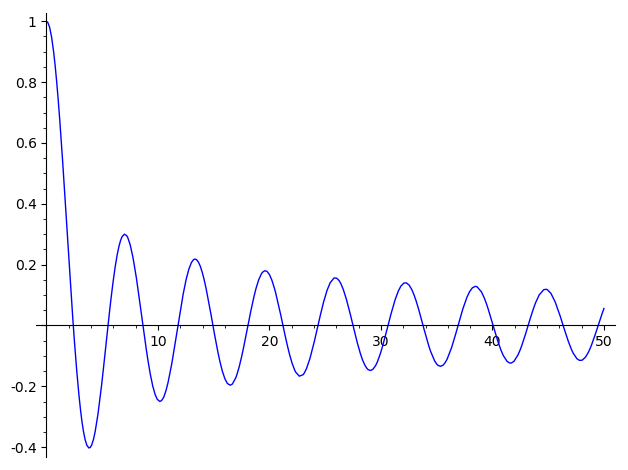

[2.404825557695772,
 5.520078110286311,
 8.653727912911013,
 11.791534439014281,
 14.930917708487819,
 18.071063967910924,
 21.21163662987927,
 24.352471530749302,
 27.493479132040253,
 30.634606468431976,
 33.77582021357357,
 36.917098353664045,
 40.0584257646282,
 43.19979171317673,
 46.34118837166201,
 49.48260989739783]

In [4]:
tol=0.000000000001
def find_root_recursive(func,a,b,tol=0.000000000001):
    L = []
    if b - a < tol:
        return L
    try:
        #print ("a = ", a, "b = ", b)
        #print (func(x=a), func(x=b))
        x0 = find_root(func,a,b)
        #print ("x0 =", x0, func(x=x0))
        L.append(x0)
        L += find_root_recursive(func,a,x0-tol,tol)       
        L += find_root_recursive(func,x0+tol,b,tol)       
    except Exception as ex:
        #print(str(ex))
        pass
    return L

plot(bessel_J(m_val,x),0.1,50).show()
first_bessel_roots = find_root_recursive(bessel_J(m_val,x),0.1,50)
first_bessel_roots.sort()
first_bessel_roots

In [5]:
def bessel_J_diff(m, arg):
    return bessel_J(m, x).diff(x).subs(x == arg)

In [6]:
exec(preparse("bessel_J_d = lambda m, x: " + str(bessel_J(m,x).diff(x)) +""))

In [7]:
n_layers = 2

In [8]:
mu = []
for i in range(n_layers):
    exec("mu_" + str(i) + "= var('mu_" + str(i) + "')")
    exec("assume(mu_" + str(i) + ", 'real')")
    exec("mu += [mu_" + str(i) +"]")

In [9]:
epsilon = []
for i in range(n_layers):
    exec("epsilon_" + str(i) + "= var('epsilon_" + str(i) + "')")
    exec("assume(epsilon_" + str(i) + ", 'real')")
    exec("epsilon += [epsilon_" + str(i) +"]")

In [10]:
A_z = []
for i in range(n_layers):
    exec("A_z_" + str(i) + "= var('A_z_" + str(i) + "')")
    exec("assume(A_z_" + str(i) + ", 'real')")
    exec("A_z += [A_z_" + str(i) +"]")

In [11]:
A_z

[A_z_0, A_z_1]

In [12]:
B_z = []
for i in range(n_layers):
    exec("B_z_" + str(i) + "= var('B_z_" + str(i) + "')")
    exec("assume(B_z_" + str(i) + ", 'real')")
    exec("B_z += [B_z_" + str(i) +"]")

In [13]:
B_z

[B_z_0, B_z_1]

In [14]:
k = []
for i in range(n_layers):
    exec("k_" + str(i) + "= var('k_" + str(i) + "')")
    exec("assume(k_" + str(i) + ", 'real')")
    exec("k += [k_" + str(i) +"]")

$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c}\vec{j}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c} \sigma \vec{E}$


$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}rot\,\vec{H}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E}  + \frac{4\pi}{c} \sigma \vec{E} \right)$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} \vec{E} + \mu\,\frac{4\pi\,i\,\omega}{c^2} \sigma \vec{E}$


$rot\,rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} rot\, \vec{E}$

$rot\,rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta}\,\vec{H}$


In [15]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa = []
for i in range(n_layers):
    eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 == kappa^2]

display(Math(latex(eq_kappa)))

<IPython.core.display.Math object>

In [16]:
E_mode = True

In [17]:
E_rh = []
for i in range(n_layers):
    if E_mode:
        E_rh += [lambda rh,ph,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*rh)*(-A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * sin(m*ph + psi_m)]
    else:
        E_rh += [lambda rh,ph,z, i=i : I*m*omega*mu[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z)) * cos(m*ph + psi_m)]


In [18]:
E_ph = []
for i in range(n_layers):
    if E_mode:
        E_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*ph + psi_m)]
    else:
        E_ph += [lambda rh,ph,z, i=i : I*omega*mu[i]/(kappa) * bessel_J_d(m,kappa*rh)*( A_z[i]*cos(k[i]*z) + B_z[i]*sin(k[i]*z)) * sin(m*ph + psi_m)]


In [19]:
E_z = []
for i in range(n_layers):
    if E_mode:
        E_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( A_z[i]*cos(k[i]*z) + B_z[i]*sin(k[i]*z)) * sin(m*ph + psi_m)]
    else:
        E_z += [lambda rh,ph,z, i=i: 0]        

In [20]:
H_rh = []
for i in range(n_layers):
    if E_mode:
        H_rh += [lambda rh,ph,z, i=i : I*m*omega*epsilon[i]/(kappa^2*c*rh) * bessel_J  (m,kappa*rh)*(-A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z)) * cos(m*ph + psi_m)]
    else:
        H_rh += [lambda rh,ph,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*rh)*(-A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * sin(m*ph + psi_m)]        

In [21]:
H_ph = []
for i in range(n_layers):
    if E_mode:
        H_ph += [lambda rh,ph,z, i=i : I*omega*epsilon[i]/(kappa*c) * bessel_J_d(m,kappa*rh)*( A_z[i]*cos(k[i]*z) + B_z[i]*sin(k[i]*z)) * sin(m*ph + psi_m)]
    else:
        H_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*ph + psi_m)]

In [22]:
H_z = []
for i in range(n_layers):
    if E_mode:
        H_z += [lambda rh,ph,z, i=i : 0]
    else:
        H_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( A_z[i]*cos(k[i]*z) + B_z[i]*sin(k[i]*z)) * sin(m*ph + psi_m)]                

In [23]:
E_rh[0](rh,ph,z)

-1/2*(B_z_0*cos(k_0*z) - A_z_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa

In [24]:
E_ph[0](rh,ph,z)

(B_z_0*cos(k_0*z) - A_z_0*sin(k_0*z))*k_0*m*bessel_J(m, kappa*rho)*cos(m*varphi + psi_m)/(kappa^2*rho)

In [25]:
if 1 < n_layers:
    E_rh[1](rh,ph,z)

In [26]:
if 1 < n_layers:
    E_ph[1](rh,ph,z)

In [27]:
E_z[0](rh,ph,z)

(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*bessel_J(m, kappa*rho)*sin(m*varphi + psi_m)

In [28]:
if 1 < n_layers:
    E_z[1](rh,ph,z)

In [29]:
def Re(v):
    if sage.rings.integer.Integer == type(v):
        return v

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    if add_vararg != v_expanded.operator():
        return v.real_part()
    else:
        expand_real_operands = ()
        for s in v_expanded.operands():
            s_factor = s.factor()
            current_s_has_image_part = False
            if mul_vararg != s_factor.operator():
                return v.real_part()
            else:
                for m in s_factor.operands():
                    if bessel_J == m.operator():
                        pass
                    else:
                        if 0 != m.imag_part():
                            current_s_has_image_part = True
            if False == current_s_has_image_part:
                expand_real_operands += (s,)
        if 0 == len(expand_real_operands):
            return 0
        return (add_vararg(*expand_real_operands)).factor()

                            

def Im(v):
    if sage.rings.integer.Integer == type(v):
        return 0

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    if add_vararg != v_expanded.operator():
        return v.imag_part()
    else:
        expand_imag_operands = ()
        for s in v_expanded.operands():
            s_factor = s.factor()
            current_s_has_image_part = False
            if mul_vararg != s_factor.operator():
                return v.imag_part()
            else:
                for m in s_factor.operands():
                    if bessel_J == m.operator():
                        pass
                    else:
                        if 0 != m.imag_part():
                            current_s_has_image_part = True
            if True == current_s_has_image_part:
                expand_imag_operands += (s/I,)
        if 0 == len(expand_imag_operands):
            return 0
        return (add_vararg(*expand_imag_operands)).factor()



In [30]:
ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')

In [31]:
i = 0
E0 = ES.vector_field(
    E_rh[i](rho,phi,zz),
    E_ph[i](rho,phi,zz),
    E_z[i](rho,phi,zz),
    name='E0')

In [32]:
H0 = ES.vector_field(
    H_rh[i](rho,phi,zz),
    H_ph[i](rho,phi,zz),
    H_z[i](rho,phi,zz),
    name='H0')

In [33]:
from sage.manifolds.operators import *
rot_rot_E0 = curl(curl(E0))
rot_rot_H0 = curl(curl(H0))

In [34]:
rot_rot_E0.display()

curl(curl(E0)) = -1/2*((((B_z_0*k_0^3 + B_z_0*k_0*kappa^2)*bessel_j(m + 1, kappa*rho) - (B_z_0*k_0^3 + B_z_0*k_0*kappa^2)*bessel_j(m - 1, kappa*rho))*cos(psi_m)*sin(m*phi) + ((B_z_0*k_0^3 + B_z_0*k_0*kappa^2)*bessel_j(m + 1, kappa*rho) - (B_z_0*k_0^3 + B_z_0*k_0*kappa^2)*bessel_j(m - 1, kappa*rho))*cos(m*phi)*sin(psi_m))*cos(k_0*zz) - (((A_z_0*k_0^3 + A_z_0*k_0*kappa^2)*bessel_j(m + 1, kappa*rho) - (A_z_0*k_0^3 + A_z_0*k_0*kappa^2)*bessel_j(m - 1, kappa*rho))*cos(psi_m)*sin(m*phi) + ((A_z_0*k_0^3 + A_z_0*k_0*kappa^2)*bessel_j(m + 1, kappa*rho) - (A_z_0*k_0^3 + A_z_0*k_0*kappa^2)*bessel_j(m - 1, kappa*rho))*cos(m*phi)*sin(psi_m))*sin(k_0*zz))/kappa e_rho + (((B_z_0*k_0^3 + B_z_0*k_0*kappa^2)*m*bessel_j(m, kappa*rho)*cos(m*phi)*cos(psi_m) - (B_z_0*k_0^3 + B_z_0*k_0*kappa^2)*m*bessel_j(m, kappa*rho)*sin(m*phi)*sin(psi_m))*cos(k_0*zz) - ((A_z_0*k_0^3 + A_z_0*k_0*kappa^2)*m*bessel_j(m, kappa*rho)*cos(m*phi)*cos(psi_m) - (A_z_0*k_0^3 + A_z_0*k_0*kappa^2)*m*bessel_j(m, kappa*rho)*sin(m*phi)*s

In [35]:
rot_rot_H0.display()

curl(curl(H0)) = -1/4*((4*I*A_z_0*epsilon_0*m^3*omega*bessel_j(m, kappa*rho)*cos(m*phi)*cos(psi_m) - 4*I*A_z_0*epsilon_0*m^3*omega*bessel_j(m, kappa*rho)*sin(m*phi)*sin(psi_m) + ((-I*A_z_0*epsilon_0*kappa^2*m*bessel_j(m + 2, kappa*rho) - I*A_z_0*epsilon_0*kappa^2*m*bessel_j(m - 2, kappa*rho) + (4*I*A_z_0*epsilon_0*k_0^2 + 2*I*A_z_0*epsilon_0*kappa^2)*m*bessel_j(m, kappa*rho))*omega*cos(m*phi)*cos(psi_m) + (I*A_z_0*epsilon_0*kappa^2*m*bessel_j(m + 2, kappa*rho) + I*A_z_0*epsilon_0*kappa^2*m*bessel_j(m - 2, kappa*rho) + (-4*I*A_z_0*epsilon_0*k_0^2 - 2*I*A_z_0*epsilon_0*kappa^2)*m*bessel_j(m, kappa*rho))*omega*sin(m*phi)*sin(psi_m))*rho^2 + ((2*I*A_z_0*epsilon_0*kappa*m*bessel_j(m + 1, kappa*rho) - 2*I*A_z_0*epsilon_0*kappa*m*bessel_j(m - 1, kappa*rho))*omega*cos(m*phi)*cos(psi_m) + (-2*I*A_z_0*epsilon_0*kappa*m*bessel_j(m + 1, kappa*rho) + 2*I*A_z_0*epsilon_0*kappa*m*bessel_j(m - 1, kappa*rho))*omega*sin(m*phi)*sin(psi_m))*rho)*cos(k_0*zz) + (4*I*B_z_0*epsilon_0*m^3*omega*bessel_j(m, kap

In [36]:
mu_epsilon_omega2_c2_E0 = mu[i] * epsilon[i] * (omega^2 / c^2) * E0
mu_epsilon_omega2_c2_H0 = mu[i] * epsilon[i] * (omega^2 / c^2) * H0

In [37]:
mu_epsilon_omega2_c2_E0.display()

-1/2*(((B_z_0*epsilon_0*k_0*bessel_j(m + 1, kappa*rho) - B_z_0*epsilon_0*k_0*bessel_j(m - 1, kappa*rho))*mu_0*omega^2*cos(psi_m)*sin(m*phi) + (B_z_0*epsilon_0*k_0*bessel_j(m + 1, kappa*rho) - B_z_0*epsilon_0*k_0*bessel_j(m - 1, kappa*rho))*mu_0*omega^2*cos(m*phi)*sin(psi_m))*cos(k_0*zz) - ((A_z_0*epsilon_0*k_0*bessel_j(m + 1, kappa*rho) - A_z_0*epsilon_0*k_0*bessel_j(m - 1, kappa*rho))*mu_0*omega^2*cos(psi_m)*sin(m*phi) + (A_z_0*epsilon_0*k_0*bessel_j(m + 1, kappa*rho) - A_z_0*epsilon_0*k_0*bessel_j(m - 1, kappa*rho))*mu_0*omega^2*cos(m*phi)*sin(psi_m))*sin(k_0*zz))/(c^2*kappa) e_rho + ((B_z_0*epsilon_0*k_0*m*mu_0*omega^2*bessel_j(m, kappa*rho)*cos(m*phi)*cos(psi_m) - B_z_0*epsilon_0*k_0*m*mu_0*omega^2*bessel_j(m, kappa*rho)*sin(m*phi)*sin(psi_m))*cos(k_0*zz) - (A_z_0*epsilon_0*k_0*m*mu_0*omega^2*bessel_j(m, kappa*rho)*cos(m*phi)*cos(psi_m) - A_z_0*epsilon_0*k_0*m*mu_0*omega^2*bessel_j(m, kappa*rho)*sin(m*phi)*sin(psi_m))*sin(k_0*zz))/(c^2*kappa^2*rho) e_phi + ((A_z_0*epsilon_0*mu_0*om

In [38]:
mu_epsilon_omega2_c2_H0.display()

((-I*A_z_0*epsilon_0^2*m*mu_0*omega^3*bessel_j(m, kappa*rho)*cos(m*phi)*cos(psi_m) + I*A_z_0*epsilon_0^2*m*mu_0*omega^3*bessel_j(m, kappa*rho)*sin(m*phi)*sin(psi_m))*cos(k_0*zz) + (-I*B_z_0*epsilon_0^2*m*mu_0*omega^3*bessel_j(m, kappa*rho)*cos(m*phi)*cos(psi_m) + I*B_z_0*epsilon_0^2*m*mu_0*omega^3*bessel_j(m, kappa*rho)*sin(m*phi)*sin(psi_m))*sin(k_0*zz))/(c^3*kappa^2*rho) e_rho - 1/2*(((I*A_z_0*epsilon_0^2*bessel_j(m + 1, kappa*rho) - I*A_z_0*epsilon_0^2*bessel_j(m - 1, kappa*rho))*mu_0*omega^3*cos(psi_m)*sin(m*phi) + (I*A_z_0*epsilon_0^2*bessel_j(m + 1, kappa*rho) - I*A_z_0*epsilon_0^2*bessel_j(m - 1, kappa*rho))*mu_0*omega^3*cos(m*phi)*sin(psi_m))*cos(k_0*zz) + ((I*B_z_0*epsilon_0^2*bessel_j(m + 1, kappa*rho) - I*B_z_0*epsilon_0^2*bessel_j(m - 1, kappa*rho))*mu_0*omega^3*cos(psi_m)*sin(m*phi) + (I*B_z_0*epsilon_0^2*bessel_J(m + 1, kappa*rho) - I*B_z_0*epsilon_0^2*bessel_J(m - 1, kappa*rho))*mu_0*omega^3*cos(m*phi)*sin(psi_m))*sin(k_0*zz))/(c^3*kappa) e_phi

In [39]:
eq_rot_rot_E = []
eq_rot_rot_H = []
for j in ES.irange():
    omega_2_subs =  solve(eq_kappa[i], omega^2)
    omega_4_subs = [omega_2_subs[0].lhs()^2 == omega_2_subs[0].rhs()^2]
    if E_mode:
        eq_rot_rot_E += [( rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0]
        eq_rot_rot_H += [((rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0]
    else:
        eq_rot_rot_E += [((rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0]
        eq_rot_rot_H += [( rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0]


In [40]:
eq_rot_rot_E

[0 == 0,
 0 == 0,
 -1/4*(kappa^2*rho^2*bessel_J(m + 2, kappa*rho) + 2*kappa^2*rho^2*bessel_J(m, kappa*rho) + kappa^2*rho^2*bessel_j(m - 2, kappa*rho) - 2*kappa*rho*bessel_j(m + 1, kappa*rho) + 2*kappa*rho*bessel_j(m - 1, kappa*rho) - 4*m^2*bessel_j(m, kappa*rho))*(k_0^2 + kappa^2)*(A_z_0*cos(k_0*zz) + B_z_0*sin(k_0*zz))*(cos(psi_m)*sin(m*phi) + cos(m*phi)*sin(psi_m))/(kappa^2*rho^2) == 0]

In [41]:
if E_mode:
    eq_rot_rot_Ez = (eq_rot_rot_E[2])
    display(Math(latex(eq_rot_rot_Ez)))

<IPython.core.display.Math object>

In [42]:
if E_mode:
    display(Math(latex(eq_rot_rot_Ez.lhs().numerator().operands()[0])))

<IPython.core.display.Math object>

In [43]:
if E_mode:
    print(eq_rot_rot_Ez.lhs().numerator().operands()[0].variables())

(kappa, m, rho)


verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 200 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: 'unable to simplify to float approximation'


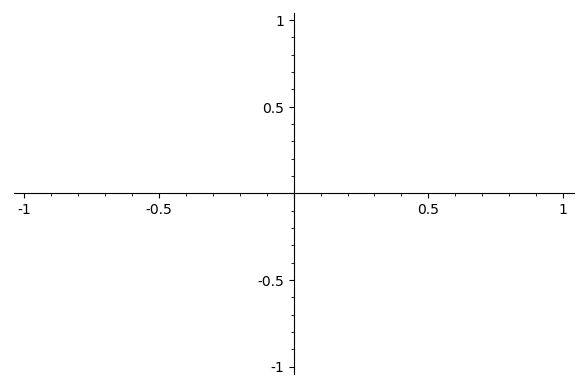

In [44]:
if E_mode:
    plot(eq_rot_rot_Ez.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [45]:
if not E_mode:
    eq_rot_rot_Erh = (eq_rot_rot_E[0])
    display(Math(latex(eq_rot_rot_Erh)))

In [46]:
if not E_mode:
    display(Math(latex(eq_rot_rot_Erh.lhs().numerator().operands()[0])))

In [47]:
if not E_mode:
    print(eq_rot_rot_Erh.lhs().numerator().operands()[0].variables())

In [48]:
if not E_mode:
    plot(eq_rot_rot_Erh.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [49]:
if not E_mode:
    eq_rot_rot_Eph = (eq_rot_rot_E[1])
    display(Math(latex(eq_rot_rot_Eph)))

In [50]:
if not E_mode:
    display(Math(latex(eq_rot_rot_Eph.lhs().numerator().operands()[0])))

In [51]:
if not E_mode:
    print(eq_rot_rot_Eph.lhs().numerator().operands()[0].variables())

In [52]:
if not E_mode:
    plot(eq_rot_rot_Eph.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [53]:
display(Math(latex(eq_rot_rot_H)))

<IPython.core.display.Math object>

In [54]:
if E_mode:
    eq_rot_rot_Hrh = (eq_rot_rot_H[0])
    display(Math(latex(eq_rot_rot_Hrh)))

<IPython.core.display.Math object>

In [55]:
if E_mode:
    eq_rot_rot_Hph = (eq_rot_rot_H[1])
    display(Math(latex(eq_rot_rot_Hph)))

<IPython.core.display.Math object>

In [56]:
if E_mode:
    print(eq_rot_rot_Hrh.lhs().operator())

<function mul_vararg at 0x7fd052872c20>


In [57]:
if E_mode:
    print(eq_rot_rot_Hph.lhs().operator())

<function mul_vararg at 0x7fd052872c20>


In [58]:
if E_mode:
    display(Math(latex(eq_rot_rot_Hrh.lhs().operands()[0])))

<IPython.core.display.Math object>

verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 200 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: 'unable to simplify to float approximation'


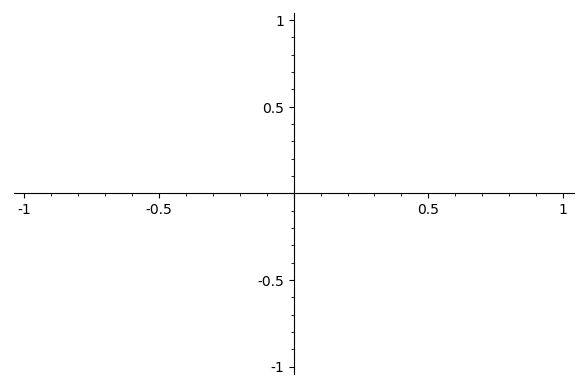

In [59]:
if E_mode:
    plot(eq_rot_rot_Hrh.lhs().operands()[0].subs(kappa==1, m == 1, psi_m == pi/2), rh).show()

In [60]:
if E_mode:
    display(Math(latex(eq_rot_rot_Hph.lhs().operands()[0])))

<IPython.core.display.Math object>

verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 200 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: 'unable to simplify to float approximation'


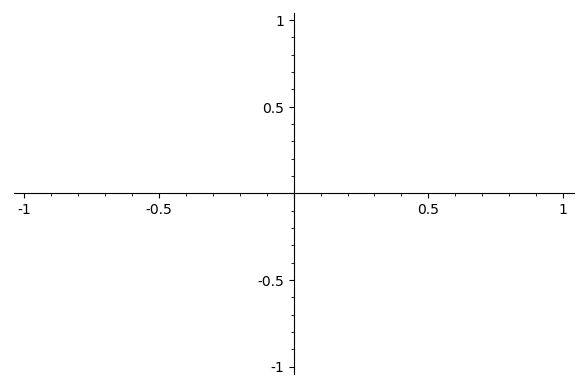

In [61]:
if E_mode:
    plot(eq_rot_rot_Hph.lhs().operands()[0].subs(kappa==1, m == 1, psi_m == pi/2), rh).show()

In [62]:
if not E_mode:
    eq_rot_rot_Hz = (eq_rot_rot_H[2])
    display(Math(latex(eq_rot_rot_Hz)))

In [63]:
if not E_mode:
    print(eq_rot_rot_Hz.lhs().operator())

In [64]:
if not E_mode:
    display(Math(latex(eq_rot_rot_Hz.lhs().operands()[0])))

In [65]:
if not E_mode:
    plot(eq_rot_rot_Hz.lhs().operands()[0].subs(kappa==1, m == 1, psi_m == pi/2), rh).show()

In [66]:
rotE_rh = []
for i in range(n_layers):
    exec(preparse("rotE_rh += [lambda rh,ph,z, i=i: " + str(diff(E_z[i](rh,ph,z),ph)/rh - E_ph[i](rh,ph,z).diff(z)) +"]"))

In [67]:
rotE_ph = []
for i in range(n_layers):
    exec(preparse("rotE_ph += [lambda rh,ph,z, i=i: " + str(E_rh[i](rh,ph,z).diff(z)-diff(E_z[i](rh,ph,z),rh)) +"]"))

In [68]:
rotE_z = []
for i in range(n_layers):
    exec(preparse("rotE_z += [lambda rh,ph,z, i=i: " + str(((rh*E_ph[i](rh,ph,z)).diff(rh) - E_rh[i](rh,ph,z).diff(ph))/rh) +"]"))

In [69]:
rotE_ph[0](rh,ph,z)

1/2*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m) + 1/2*(A_z_0*k_0*cos(k_0*z) + B_z_0*k_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa

In [70]:
if 1 < n_layers:
    rotE_ph[1](rh,ph,z)

In [71]:
rotE_rh[0](rh,ph,z)

(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*m*bessel_J(m, kappa*rho)*cos(m*varphi + psi_m)/rho + (A_z_0*k_0*cos(k_0*z) + B_z_0*k_0*sin(k_0*z))*k_0*m*bessel_J(m, kappa*rho)*cos(m*varphi + psi_m)/(kappa^2*rho)

In [72]:
rotE_z[0](rh,ph,z)

0

In [73]:
H_rh_ = []
for i in range(n_layers):
    H_rh_ += [lambda rh,ph,z, i=i : rotE_rh[i](rh,ph,z)*c/(I*omega *mu[i])]

In [74]:
H_ph_ = []
for i in range(n_layers):
    H_ph_ += [lambda rh,ph,z, i=i : rotE_ph[i](rh,ph,z)*c/(I*omega *mu[i])]

In [75]:
H_z_ = []
for i in range(n_layers):
    H_z_ += [lambda rh,ph,z, i=i : rotE_z[i](rh,ph,z)*c/(I*omega *mu[i])]

In [76]:
H_rh_[0](rh,ph,z).factor()

-I*(k_0^2 + kappa^2)*(A_z_0*cos(k_0*z) + B_z_0*sin(k_0*z))*c*m*bessel_J(m, kappa*rho)*cos(m*varphi + psi_m)/(kappa^2*mu_0*omega*rho)

In [77]:
if 1 < n_layers:
    H_rh_[1](rh,ph,z)

In [78]:
display(Math(latex(H_ph[0](rh,ph,z).factor())))

<IPython.core.display.Math object>

In [79]:
H_ph_[0](rh,ph,z).subs(m == 0, B_z[0] == 0)

-1/2*I*(A_z_0*k_0^2*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho))*cos(k_0*z)*sin(psi_m)/kappa + A_z_0*kappa*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho))*cos(k_0*z)*sin(psi_m))*c/(mu_0*omega)

In [80]:
if 1 < n_layers:
    H_ph_[1](rh,ph,z)

In [81]:
H_z_[0](rh,ph,z)

0

In [82]:
if 1 < n_layers:
    H_z_[1](rh,ph,z)

In [83]:
# граничные условия
# тангенциальная компонента электрического поля
eq_Erh_superconductor_boundary_conditions = []
eq_Erh_superconductor_boundary_conditions += [E_rh[0](rh,ph,0) == 0.0]
eq_Erh_superconductor_boundary_conditions += [E_rh[n_layers - 1](rh,ph,h*n_layers) == 0.0]

eq_Eph_superconductor_boundary_conditions = []
eq_Eph_superconductor_boundary_conditions += [E_ph[0](rh,ph,0) == 0.0]
eq_Eph_superconductor_boundary_conditions += [E_ph[n_layers - 1](rh,ph,h*n_layers) == 0.0]

display(Math(latex(eq_Erh_superconductor_boundary_conditions)))
display(Math(latex(eq_Eph_superconductor_boundary_conditions)))

if E_mode:
    var_begin = B_z[0]
    var_end   = B_z[n_layers - 1]
else:
    var_begin = A_z[0]
    var_end   = A_z[n_layers - 1]

boundary_Erh_subs_begin = solve(eq_Erh_superconductor_boundary_conditions[0], var_begin)
boundary_Erh_subs_end   = solve(eq_Erh_superconductor_boundary_conditions[1], var_end)

boundary_Eph_subs_begin = solve(eq_Eph_superconductor_boundary_conditions[0], var_begin)
boundary_Eph_subs_end   = solve(eq_Eph_superconductor_boundary_conditions[1], var_end)

display(Math(latex(boundary_Erh_subs_begin)))
display(Math(latex(boundary_Erh_subs_end)))

display(Math(latex(boundary_Eph_subs_begin)))
display(Math(latex(boundary_Eph_subs_end)))

boundary_conductor = boundary_Erh_subs_begin + boundary_Erh_subs_end
#boundary_conductor += boundary_Eph_subs_begin + boundary_Eph_subs_end
display(Math(latex(boundary_conductor)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [84]:
E_rho = []
for i in range(n_layers):
    exec(preparse("E_rho += [ lambda rh, ph, z, i=i : " + str(E_rh[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [85]:
E_phi = []
for i in range(n_layers):
    exec(preparse("E_phi += [ lambda rh, ph, z, i=i : " + str(E_ph[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [86]:
E_zz = []
for i in range(n_layers):
    exec(preparse("E_zz += [ lambda rh, ph, z, i=i : " + str(E_z[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [87]:
H_rho = []
for i in range(n_layers):
    exec(preparse("H_rho += [ lambda rh, ph, z, i=i : " + str(H_rh[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [88]:
H_phi = []
for i in range(n_layers):
    exec(preparse("H_phi += [ lambda rh, ph, z, i=i : " + str(H_ph[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [89]:
H_zz = []
for i in range(n_layers):
    exec(preparse("H_zz += [ lambda rh, ph, z, i=i : " + str(H_z[i](rh,ph,z).subs(boundary_conductor)) +"]"))

In [90]:
if 0 < n_layers:
    display(Math(latex(E_rh[0](rh,ph,z))))
    display(Math(latex(E_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [91]:
if 1 < n_layers:
    display(Math(latex(E_rh[1](rh,ph,z))))
    display(Math(latex(E_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [92]:
if 0 < n_layers:
    display(Math(latex(E_z[0](rh,ph,z))))
    display(Math(latex(E_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [93]:
if 1 < n_layers:
    display(Math(latex(E_z[1](rh,ph,z))))
    display(Math(latex(E_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [94]:
if 0 < n_layers:
    display(Math(latex(H_rh[0](rh,ph,z))))
    display(Math(latex(H_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [95]:
if 1 < n_layers:
    display(Math(latex(H_rh[1](rh,ph,z))))
    display(Math(latex(H_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [96]:
if 0 < n_layers:
    display(Math(latex(H_ph[0](rh,ph,z))))
    display(Math(latex(H_phi[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [97]:
if 1 < n_layers:
    display(Math(latex(H_ph[1](rh,ph,z))))
    display(Math(latex(H_phi[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [98]:
if 1 < n_layers:
    display(Math(latex(H_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

In [99]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [100]:
all_vars = []
for i in range(n_layers):
    all_vars += [A_z[i], B_z[i]]
    
all_vars

[A_z_0, B_z_0, A_z_1, B_z_1]

In [101]:
def reduceDependedRows(M):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())

    M_pivot_rows = M.pivot_rows()
    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    #for row in M_rows:
    #    print("row =")
    #    display(Math(latex(row)))

    reduced_list = []
    for r in M_pivot_rows:
        #print ("M_rows[", r, "] =")
        #display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    #if reduced_M.nrows() == reduced_M.ncols():
        #reduced_M_det = reduced_M.det()
        #print ("")
        #print ("reduced_M.det() =")
        #display(Math(latex(reduced_M_det)))
    return reduced_M

In [102]:
def make_eqsys_from_reduced_M(M_rotH, vars):
    xx = vector(SR, vars)
    # print("eqns =")
    eqns = [(M_rotH*xx)[index] == 0 for index in range(M_rotH.nrows())]
    # display(Math(latex(eqns)))
    return (eqns)

In [103]:
bch = []
bc =  []
for i  in range (n_layers-1):
    if E_mode:
        bc += [(E_rho[i](rh,ph, (i + 1) * h) == E_rho[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bc += [(E_phi[i](rh,ph, (i + 1) * h) == E_phi[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bc += [(epsilon[i] * E_z[i](rh,ph,(i+1)*h) == epsilon[i+1]*E_z[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bch += [(H_phi [i](rh,ph,(i+1)*h) == H_phi [i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
    else:
        bc += [(H_rho[i](rh,ph, (i + 1) * h) == H_rho[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bc += [(H_phi[i](rh,ph, (i + 1) * h) == H_phi[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bc += [(mu[i] * H_z[i](rh,ph,(i+1)*h) == mu[i+1]*H_z[i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]
        bch += [(E_phi [i](rh,ph,(i+1)*h) == E_phi [i+1](rh,ph,(i+1)*h)).subs(boundary_conductor)]

In [104]:
display(Math(latex(bc)))

<IPython.core.display.Math object>

In [105]:
bch

[-1/2*I*A_z_0*epsilon_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h*k_0)*sin(m*varphi + psi_m)/(c*kappa) == -1/2*(I*A_z_1*cos(h*k_1) + I*A_z_1*sin(2*h*k_1)*sin(h*k_1)/cos(2*h*k_1))*epsilon_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/(c*kappa)]

In [106]:
all_eqs = bc \
        + boundary_conductor

#display(Math(latex(all_eqs)))

In [107]:
M = GenerateMatrix(all_eqs, all_vars)

In [108]:
display(Math(latex(M)))

<IPython.core.display.Math object>

In [109]:
M.nrows(), M.ncols(), len(all_vars)

(5, 4, 4)

In [110]:
M.rank()

4

In [111]:
reduced_M = reduceDependedRows(M)


M.nrows() 5
M.ncols() 4
M.rank() 4
M.pivot_rows() = (0, 2, 3, 4)


In [112]:
reduced_M.nrows(), reduced_M.ncols(),

(4, 4)

In [113]:
reduced_M.pivots()

(0, 1, 2, 3)

In [114]:
def reduceEmptyCols(M, vars):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())
    print ("len(vars)", len(vars))

    M_pivots = M.pivots()
    print ("M.pivots() =", M_pivots)
    
    M_transposed = M.transpose()

    M_cols = M_transposed.rows()
    #for col in M_cols:
    #    print("col =")
    #    display(Math(latex(col)))

    reduced_list = []
    reduced_vars = []
    for c in M_pivots:
        #print ("M_cols[", c, "] =")
        #display(Math(latex(M_cols[c])))
        reduced_list.append(M_cols[c])
        reduced_vars.append(vars[c])

    reduced_M_transposed = matrix(SR, len(M_pivots), M.nrows(), reduced_list)
    return reduced_vars, reduced_M_transposed.transpose()

In [115]:
reduced_vars, reduced_reduced_M = reduceEmptyCols(reduced_M, all_vars)


M.nrows() 4
M.ncols() 4
M.rank() 4
len(vars) 4
M.pivots() = (0, 1, 2, 3)


In [116]:
reduced_reduced_M.nrows(), reduced_reduced_M.ncols(), len(reduced_vars)

(4, 4, 4)

In [117]:
reduced_vars

[A_z_0, B_z_0, A_z_1, B_z_1]

In [118]:
display(Math(latex(reduced_reduced_M)))

<IPython.core.display.Math object>

In [119]:
reduced_reduced_M

[                                         1/2*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(h*k_0)*sin(m*varphi + psi_m)/kappa                                                                                                                                                 0 1/2*k_1*(cos(h*k_1)*sin(2*h*k_1)/cos(2*h*k_1) - sin(h*k_1))*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa                                                                                                                                                 0]
[                                                                                epsilon_0*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(m*varphi + psi_m)                                                                                                                                                 0                                       -epsilon_1*(sin(2*h*k_1)*sin(h*k_1)/cos(2*h*k_1) + cos(h*k_1))*bessel_J(m, kappa*rh

In [120]:
def Preparse(s):
    s = s.replace('bessel_j', 'bessel_J')
    return preparse(s)

In [121]:
type(reduced_reduced_M)

<class 'sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense'>

In [122]:
exec("reduced_reduced_M_det = " + Preparse(str(reduced_reduced_M.det())))

In [123]:
display(Math(latex(reduced_reduced_M_det)))

<IPython.core.display.Math object>

In [124]:
reduced_reduced_M_det

1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2/kappa - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2/kappa + 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1)*sin(m*varphi + psi_m)^2/kappa + 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1)*sin(m*varphi + psi_m)^2/kappa + 1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa

In [125]:
M_det  = reduced_reduced_M_det

In [126]:
M_det

1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2/kappa - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2/kappa + 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1)*sin(m*varphi + psi_m)^2/kappa + 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*sin(h*k_1)*sin(m*varphi + psi_m)^2/kappa + 1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2/(kappa*cos(2*h*k_1)) - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa

In [127]:
# display(Math(latex(M_det)))

In [128]:
M_det_num = M_det.numerator()

In [129]:
M_det_num

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2 - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2 + epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2 - epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2 - epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2 + epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2 + epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2 - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2

In [130]:
M_det_num.variables()

(epsilon_0, epsilon_1, h, k_0, k_1, kappa, m, psi_m, rho, varphi)

In [131]:
M_det.full_simplify().numerator()

-epsilon_1*k_0*bessel_J(m, kappa*rho)*bessel_j(m + 1, kappa*rho)*cos(h*k_1)*cos(psi_m)^2*sin(h*k_0)*sin(m*varphi)^2 + epsilon_1*k_0*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h*k_1)*cos(psi_m)^2*sin(h*k_0)*sin(m*varphi)^2 - epsilon_0*k_1*bessel_J(m, kappa*rho)*bessel_j(m + 1, kappa*rho)*cos(h*k_0)*cos(psi_m)^2*sin(h*k_1)*sin(m*varphi)^2 + epsilon_0*k_1*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h*k_0)*cos(psi_m)^2*sin(h*k_1)*sin(m*varphi)^2 - 2*epsilon_1*k_0*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h*k_1)*cos(m*varphi)*cos(psi_m)*sin(h*k_0)*sin(m*varphi)*sin(psi_m) + 2*epsilon_1*k_0*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h*k_1)*cos(m*varphi)*cos(psi_m)*sin(h*k_0)*sin(m*varphi)*sin(psi_m) - 2*epsilon_0*k_1*bessel_j(m + 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h*k_0)*cos(m*varphi)*cos(psi_m)*sin(h*k_1)*sin(m*varphi)*sin(psi_m) + 2*epsilon_0*k_1*bessel_j(m - 1, kappa*rho)*bessel_j(m, kappa*rho)*cos(h*k_0)*cos(m*varphi)*cos(psi_m)*sin(h*k_1

In [132]:
M_det_num_expand = M_det_num.expand()

In [133]:
M_det_num_expand.operator()

<function add_vararg at 0x7fd053f25f80>

In [134]:
for operand in M_det_num_expand.operands():
    print (operand)
    print ("")

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2

-epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2

epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2

-epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2

-epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2

epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2

-epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2



In [135]:
M_det_num

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2 - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0)*sin(m*varphi + psi_m)^2 + epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2 - epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1)*sin(m*varphi + psi_m)^2 - epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2 + epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2 + epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2 - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)*sin(m*varphi + psi_m)^2

In [136]:
M_det_num_factor = M_det_num.factor()
M_det_num_factor

(epsilon_1*k_0*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0) + epsilon_0*k_1*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1) - epsilon_0*k_1*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1) + epsilon_1*k_0*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1))*(bessel_j(m + 1, kappa*rho) - bessel_j(m - 1, kappa*rho))*bessel_J(m, kappa*rho)*sin(m*varphi + psi_m)^2

In [137]:
M_det_num_factor.operator()

<function mul_vararg at 0x7fd052872c20>

In [138]:
M_det_num_factor.operands()

[epsilon_1*k_0*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0) + epsilon_0*k_1*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1) - epsilon_0*k_1*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1) + epsilon_1*k_0*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1),
 bessel_j(m + 1, kappa*rho) - bessel_j(m - 1, kappa*rho),
 bessel_J(m, kappa*rho),
 sin(m*varphi + psi_m)^2]

In [139]:
M_det_num_factor_operands = ()
for operand in M_det_num_factor.operands():
    print (operand)
    print (operand.variables())
    if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        exec("M_det_num_factor_operands += (" + Preparse(str(operand)) + ",)")
    print ("")
    
M_det_num_factor_operands

epsilon_1*k_0*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0) + epsilon_0*k_1*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1) - epsilon_0*k_1*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1) + epsilon_1*k_0*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1)
(epsilon_0, epsilon_1, h, k_0, k_1)

bessel_j(m + 1, kappa*rho) - bessel_j(m - 1, kappa*rho)
(kappa, m, rho)

bessel_J(m, kappa*rho)
(kappa, m, rho)

sin(m*varphi + psi_m)^2
(m, psi_m, varphi)



(epsilon_1*k_0*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0) + epsilon_0*k_1*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1) - epsilon_0*k_1*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1) + epsilon_1*k_0*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1),)

In [140]:
M_det_num_factor_operands

(epsilon_1*k_0*cos(2*h*k_1)*cos(h*k_1)*sin(h*k_0) + epsilon_0*k_1*cos(h*k_0)*cos(h*k_1)*sin(2*h*k_1) - epsilon_0*k_1*cos(h*k_0)*cos(2*h*k_1)*sin(h*k_1) + epsilon_1*k_0*sin(h*k_0)*sin(2*h*k_1)*sin(h*k_1),)

In [141]:
from sage.symbolic.operators import add_vararg, mul_vararg
M_det_num = mul_vararg(*M_det_num_factor_operands)

In [142]:
display(Math(latex(M_det_num.factor())))

<IPython.core.display.Math object>

In [143]:
M_det_num.variables()

(epsilon_0, epsilon_1, h, k_0, k_1)

In [144]:
for i in range(n_layers):
    M_det_num = (M_det_num/(k [i]*sin(h*k[i]))).full_simplify().expand()

In [145]:
M_det_num

epsilon_0*cos(h*k_0)/(k_0*sin(h*k_0)) + epsilon_1*cos(h*k_1)/(k_1*sin(h*k_1))

In [146]:
disp_eq = M_det_num == 0

In [147]:
display(Math(latex(disp_eq)))

<IPython.core.display.Math object>

In [148]:
bch

[-1/2*I*A_z_0*epsilon_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h*k_0)*sin(m*varphi + psi_m)/(c*kappa) == -1/2*(I*A_z_1*cos(h*k_1) + I*A_z_1*sin(2*h*k_1)*sin(h*k_1)/cos(2*h*k_1))*epsilon_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/(c*kappa)]

In [149]:
bchs = []
for i in range(n_layers-1):
    if E_mode:
        bchs +=  [solve (bch, A_z[i+1])[0].full_simplify ().factor () ]
    else:
        bchs +=  [solve (bch, B_z[i+1])[0].full_simplify ().factor () ]

In [150]:
display(Math(latex(bchs)))

<IPython.core.display.Math object>

In [151]:
E_rho_s = []
for i in range(n_layers):
    E_rho_s += [ lambda rh, ph, z, i=i : E_rho[i](rh,ph,z).subs(bchs) ]

In [152]:
E_phi_s = []
for i in range(n_layers):
    E_phi_s += [ lambda rh, ph, z, i=i : E_phi[i](rh,ph,z).subs(bchs) ]

In [153]:
E_z_s = []
for i in range(n_layers):
    E_z_s += [ lambda rh, ph, z, i=i : E_zz[i](rh,ph,z).subs(bchs) ]

In [154]:
H_rho_s = []
for i in range(n_layers):
    H_rho_s += [ lambda rh, ph, z, i=i : H_rho[i](rh,ph,z).subs(bchs) ]

In [155]:
H_phi_s = []
for i in range(n_layers):
    H_phi_s += [ lambda rh, ph, z, i=i : H_phi[i](rh,ph,z).subs(bchs) ]

In [156]:
H_z_s = []
for i in range(n_layers):
    H_z_s += [ lambda rh, ph, z, i=i : H_zz[i](rh,ph,z).subs(bchs) ]

In [157]:
if 0 < n_layers:
    display(Math(latex(E_rho_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [158]:
if 1 < n_layers:
    display(Math(latex(E_rho_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [159]:
if 0 < n_layers:
    display(Math(latex(E_phi_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [160]:
if 1 < n_layers:
    display(Math(latex(E_phi_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [161]:
if 0 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[0](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [162]:
if 1 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[1](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [163]:
if 0 < n_layers:
    display(Math(latex(H_rho_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [164]:
if 1 < n_layers:
    display(Math(latex(H_rho_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [165]:
if 0 < n_layers:
    display(Math(latex(H_phi_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [166]:
if 1 < n_layers:
    display(Math(latex(H_phi_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [167]:
eq_kappa

[-k_0^2 + epsilon_0*mu_0*omega^2/c^2 == kappa^2,
 -k_1^2 + epsilon_1*mu_1*omega^2/c^2 == kappa^2]

In [168]:
disp_eq

epsilon_0*cos(h*k_0)/(k_0*sin(h*k_0)) + epsilon_1*cos(h*k_1)/(k_1*sin(h*k_1)) == 0

In [169]:
bessel_root_1 = first_bessel_roots[n_val]
bessel_root_1

2.404825557695772

In [170]:
kappa_d1 = bessel_root_1/a

In [171]:
#sgs
# https://technoinfo.ru/catalog/napylenie-oksida-titana-tio2/
lambda_d = 632*100*10^-9
# 632 nm
digit_values = [m == m_val, a == a_val, mu[0] == 1,  epsilon[0] == 2.468^2]
if 1 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-alyuminiya-al2o3/
    digit_values += [mu[1] == 1, epsilon[1] == 1.67^2]
    
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    # digit_values += [mu[1] == 1, epsilon[1] == 1.487^2]
c_value  = [ c == 299792458 * 100]

omega_value = [ omega  == ((2*pi * c)/ lambda_d).subs (c_value) ]
print(omega_value[0].rhs().n())

2.98046134067856e15


In [172]:
epsilon_d = []
mu_d = []

for i in range(n_layers):
    epsilon_d += [epsilon[i].subs(digit_values)]
    mu_d      += [mu[i].subs(digit_values)]

In [173]:
eq_kappa_d = []
for i in range(n_layers):
    eq_kappa_d += [eq_kappa[i].subs(kappa == kappa_d1).subs(digit_values).subs (c_value).subs(omega_value)]

In [174]:
eq_kappa_d

[6.09980772312129e9*pi^2 - k_0^2 == 0.040161013631574864,
 2.79292180740266e9*pi^2 - k_1^2 == 0.040161013631574864]

In [175]:
disp_eq_d = disp_eq.subs(digit_values).subs (c_value)

In [176]:
disp_eq_d

6.09102400000000*cos(h*k_0)/(k_0*sin(h*k_0)) + 2.78890000000000*cos(h*k_1)/(k_1*sin(h*k_1)) == 0

In [177]:
k_values = []
for i in range(n_layers):
    assume (k [i] > 0)
    k_values += solve (eq_kappa_d[i], k[i])

In [178]:
k_values

[k_0 == 1/39*sqrt(18555615093735/2*pi^2 - 926467802/15166887),
 k_1 == 1/3*sqrt(5680802956257/226*pi^2 - 5482058/15166887)]

In [179]:
k_values_d = []
for i in range(n_layers):
    k_values_d += [k_values [i].lhs() == k_values [i].rhs().n() ]

In [180]:
k_values_d

[k_0 == 245362.362944843, k_1 == 166027.206692757]

In [181]:
disp_eq_s = disp_eq_d.subs(k_values_d)

In [182]:
disp_eq_s

0.0000248246060516187*cos(245362.362944843*h)/sin(245362.362944843*h) + 0.0000167978493137033*cos(166027.206692757*h)/sin(166027.206692757*h) == 0

In [183]:
disp_eq_brakes = []
disp_eq_s_operands = ()
for operand in disp_eq_s.lhs().operands():
    print (operand)
    print (operand.variables())
    print (operand.denominator())
    # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
    operand_denominator_roots = find_root_recursive(operand.denominator(), lambda_d/32, lambda_d)
    operand_denominator_roots.sort()
    print(operand_denominator_roots)
    disp_eq_brakes += operand_denominator_roots
    #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
    #    M_det_num_factor_operands += (operand,)
    print ("")
disp_eq_brakes.sort()

0.0000248246060516187*cos(245362.362944843*h)/sin(245362.362944843*h)
(h,)
sin(245362.362944843*h)
[1.2803889789307365e-05, 2.56077797302211e-05, 3.841166927753664e-05, 5.121555915573078e-05]

0.0000167978493137033*cos(166027.206692757*h)/sin(166027.206692757*h)
(h,)
sin(166027.206692757*h)
[1.8922155689090546e-05, 3.784431137727312e-05, 5.6766467161379064e-05]



In [184]:
#disp_eq_brakes = []
#for i in range(n_layers):
#    disp_eq_brake = find_root( sin(k_values_d[i].rhs()*x) == 0, lambda_d/32, lambda_d/3)
#    for j in range (3):
#        disp_eq_brakes += [ j * pi / k_values_d [i].rhs() + disp_eq_brake]

In [185]:
disp_eq_brakes

[1.2803889789307365e-05,
 1.8922155689090546e-05,
 2.56077797302211e-05,
 3.784431137727312e-05,
 3.841166927753664e-05,
 5.121555915573078e-05,
 5.6766467161379064e-05]

In [186]:
disp_eq_s.lhs ().subs(h  == disp_eq_brakes [0] + lambda_d/64)

0.0000857414620711124

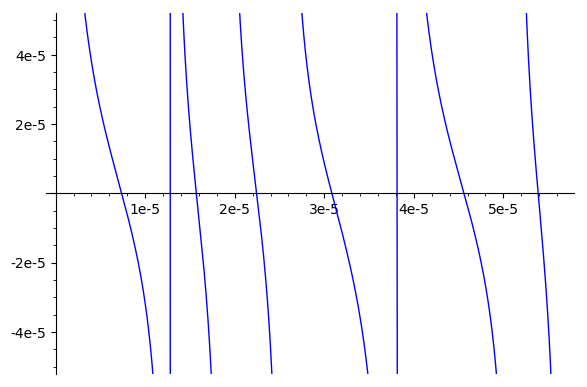

In [187]:
p = sage.plot.graphics.Graphics()
ylim = 5*10^-5
xeps = lambda_d/1024
p += plot(disp_eq_s.lhs(), xeps, disp_eq_brakes[0])
for i in range(len(disp_eq_brakes)-1):
    p += plot (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps, ymin = -ylim, ymax = ylim)

p.show()

In [188]:
h_lst = []

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        
        h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i].n())
        print(disp_eq_brakes [i+1].n())

In [189]:
h_lst 

[1.5720024693785132e-05,
 2.2448399672593224e-05,
 3.0846883154419254e-05,
 3.812811446044739e-05,
 4.560398282654757e-05,
 5.3882561304129875e-05]

In [190]:
def find_newton_root(f,x,a,b):
    df = f.diff(x)
    NewtonIt(x)=x-(f/df)(x)
    
    xn=(a+b)/2;                      # initial guess

    print (xn)
    for i in range(10):
        xn=N(NewtonIt(xn),digits=20)

        
        print (xn)

    return xn

In [191]:
h_lst_ =[]

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        h_lst_ += [find_newton_root (disp_eq_s.lhs(),h,disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i].n())
        print(disp_eq_brakes [i+1].n())



1.5863022739198955e-05
0.000015719810697436766592
0.000015720024741203350707
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
0.000015720024742913130757
2.2264967709655825e-05
0.000022448742212281217606
0.000022448399657387864859
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
0.000022448399652882903188
3.172604555374711e-05
0.000030856041780362031409
0.000030846881178373523240
0.000030846883153945281561
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
0.000030846883153945376429
3.8127990327404876e-05
0.000038128114464218009361
0.000038128114464194326320
0.000038128114464194326320
0.0000381281144641

/usr3/articles/sagemath_docker_build/sage-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


In [192]:
h_lst

[1.5720024693785132e-05,
 2.2448399672593224e-05,
 3.0846883154419254e-05,
 3.812811446044739e-05,
 4.560398282654757e-05,
 5.3882561304129875e-05]

In [193]:
h_sol = h_lst[h_val]

In [194]:
h_sol

1.5720024693785132e-05

In [195]:
a0 = var("a0")
if E_mode:
    amplitude_variable = A_z[0]
else:
    amplitude_variable = B_z[0]

In [196]:
E_rho_sol = []
for i in range(n_layers):
    E_rho_sol += [lambda rh,ph,z, a0, i=i: E_rho_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [197]:
E_phi_sol = []
for i in range(n_layers):
    E_phi_sol += [lambda rh,ph,z, a0, i=i: E_phi_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [198]:
E_z_sol = []
for i in range(n_layers):
    E_z_sol += [lambda rh,ph,z, a0, i=i: E_z_s[i](rh,ph,z)
                .subs(digit_values)
                .subs(h == h_sol)
                .subs(omega_value)
                .subs(kappa == kappa_d1)
                .subs(c_value)
                .subs(k_values_d)
                .subs(digit_values)
                .subs(amplitude_variable == a0)
                .subs(psi_m == pi/2)
               ]

In [199]:
H_rho_sol = []
for i in range(n_layers):
    H_rho_sol += [lambda rh,ph,z, a0, i=i: H_rho_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [200]:
H_phi_sol = []
for i in range(n_layers):
    H_phi_sol += [lambda rh,ph,z, a0, i=i: H_phi_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [201]:
H_z_sol = []
for i in range(n_layers):
    H_z_sol += [lambda rh,ph,z, a0, i=i: H_z_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [202]:
display(Math(latex(E_rho_s [1](rho,ph,z))))

<IPython.core.display.Math object>

In [203]:
[E_rho_s [0](rho,ph,z,1) for rho in [0..int(a_val)]]

[1/2*((2*sin(h*k_1)^2 - 1)*A_z_0*epsilon_0*cos(h*k_0)*cos(k_1*z)*sin(2*h*k_1)/(epsilon_1*cos(2*h*k_1)*cos(h*k_1)) - (2*sin(h*k_1)^2 - 1)*A_z_0*epsilon_0*cos(h*k_0)*sin(k_1*z)/(epsilon_1*cos(h*k_1)))*k_1*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa,
 1/2*((2*sin(h*k_1)^2 - 1)*A_z_0*epsilon_0*cos(h*k_0)*cos(k_1*z)*sin(2*h*k_1)/(epsilon_1*cos(2*h*k_1)*cos(h*k_1)) - (2*sin(h*k_1)^2 - 1)*A_z_0*epsilon_0*cos(h*k_0)*sin(k_1*z)/(epsilon_1*cos(h*k_1)))*k_1*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa,
 1/2*((2*sin(h*k_1)^2 - 1)*A_z_0*epsilon_0*cos(h*k_0)*cos(k_1*z)*sin(2*h*k_1)/(epsilon_1*cos(2*h*k_1)*cos(h*k_1)) - (2*sin(h*k_1)^2 - 1)*A_z_0*epsilon_0*cos(h*k_0)*sin(k_1*z)/(epsilon_1*cos(h*k_1)))*k_1*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*sin(m*varphi + psi_m)/kappa,
 1/2*((2*sin(h*k_1)^2 - 1)*A_z_0*epsilon_0*cos(h*k_0)*cos(k_1*z)*sin(2*h*k_1)/(epsilon_1*cos(2*h*k_1)*cos(h*k_1)) - (2*sin(h*k_1)^

In [204]:
if E_mode:
    print([E_z_sol [1](rho,ph,z, a0) for rho in [0..int(a_val)]])

[-(-0.929420925057213*a0*cos(166027.206692757*z) + 1.67131917461642*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), -(-0.929420925057213*a0*cos(166027.206692757*z) + 1.67131917461642*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), -(-0.929420925057213*a0*cos(166027.206692757*z) + 1.67131917461642*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), -(-0.929420925057213*a0*cos(166027.206692757*z) + 1.67131917461642*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), -(-0.929420925057213*a0*cos(166027.206692757*z) + 1.67131917461642*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), -(-0.929420925057213*a0*cos(166027.206692757*z) + 1.67131917461642*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), -(-0.929420925057213*a0*cos(166027.206692757*z) + 1.67131917461642*a0*sin(166027.206692757*z))*bessel_J(0, 0.200402129807981*rho), -(-0.929420925057213*a0*cos(166027.206692757*z) + 1.67131917461642*a0*sin(166027.2

In [205]:
[H_rho_sol [1](rho,ph,z, a0) for rho in [0..int(a_val)]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [206]:
[H_phi_sol [1](rho,ph,z, a0) for rho in [0..int(a_val)]]

[-220198.081723204*pi*(0.929420925057213*I*a0*cos(166027.206692757*z) - 1.67131917461642*I*a0*sin(166027.206692757*z))*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho)),
 -220198.081723204*pi*(0.929420925057213*I*a0*cos(166027.206692757*z) - 1.67131917461642*I*a0*sin(166027.206692757*z))*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho)),
 -220198.081723204*pi*(0.929420925057213*I*a0*cos(166027.206692757*z) - 1.67131917461642*I*a0*sin(166027.206692757*z))*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho)),
 -220198.081723204*pi*(0.929420925057213*I*a0*cos(166027.206692757*z) - 1.67131917461642*I*a0*sin(166027.206692757*z))*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho)),
 -220198.081723204*pi*(0.929420925057213*I*a0*cos(166027.206692757*z) - 1.67131917461642*I*a0*sin(166027.206692757*z))*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho)),
 -220198.081723204*pi*(0.

In [207]:
if not E_mode:
    print([H_z_sol [1](rho,ph,z, a0) for rho in [0..int(a_val)]])

In [208]:
digit_values

[m == 0,
 a == 12,
 mu_0 == 1,
 epsilon_0 == 6.09102400000000,
 mu_1 == 1,
 epsilon_1 == 2.78890000000000]

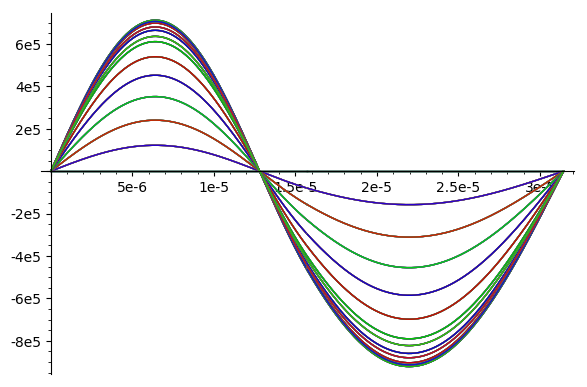

In [209]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        p += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        p += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
        
p.show ()

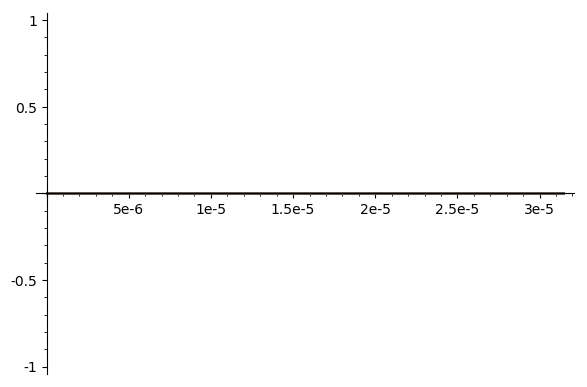

In [210]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        p += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        p += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
        
p.show ()

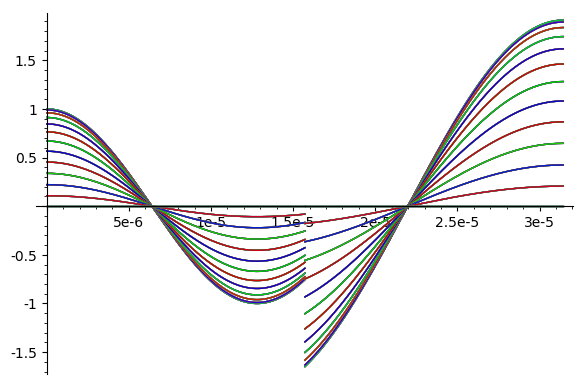

In [211]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        p += plot ([E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        p += plot ([H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

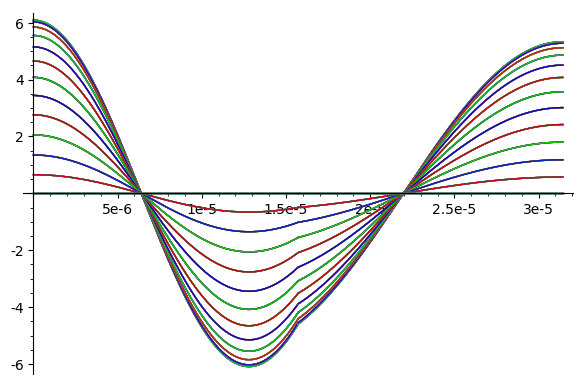

In [212]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        p += plot ([epsilon_d[i]*E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        p += plot ([mu_d[i]*H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

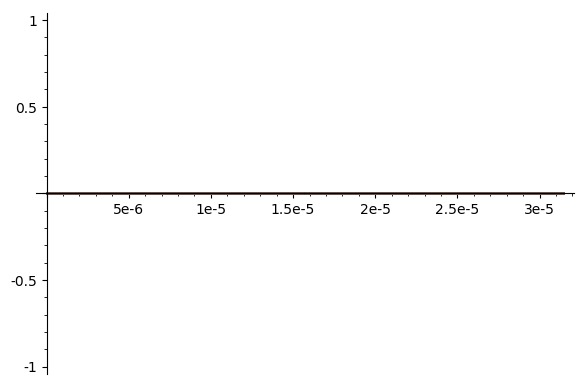

In [213]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        p += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        p += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
        
p.show ()

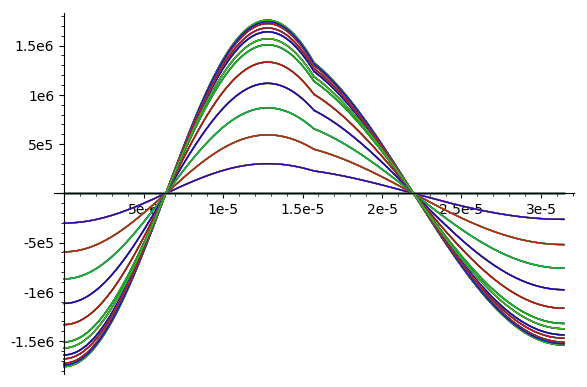

In [214]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        p += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
    else:
        p += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

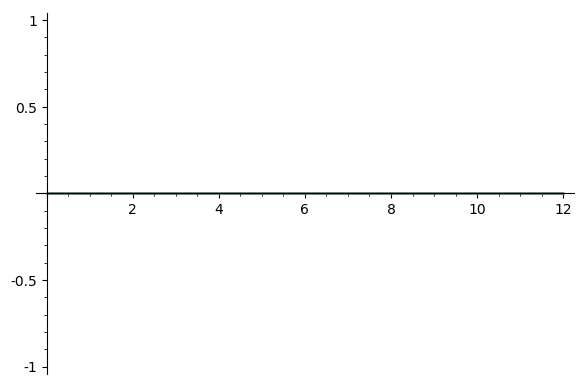

In [215]:
p = sage.plot.graphics.Graphics()

if E_mode:
    p += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    p += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
p.show ()

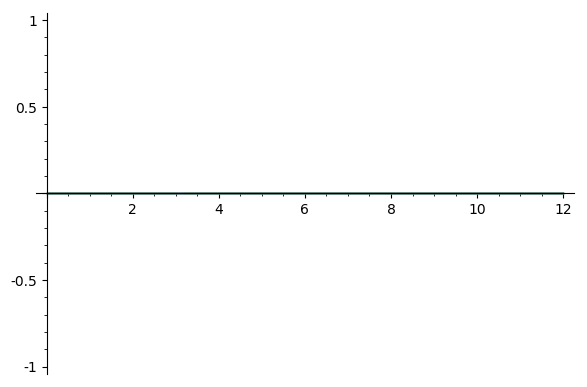

In [216]:
p = sage.plot.graphics.Graphics()

if E_mode:
    p += plot ([H_rho_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    p += plot ([H_rho_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
p.show ()

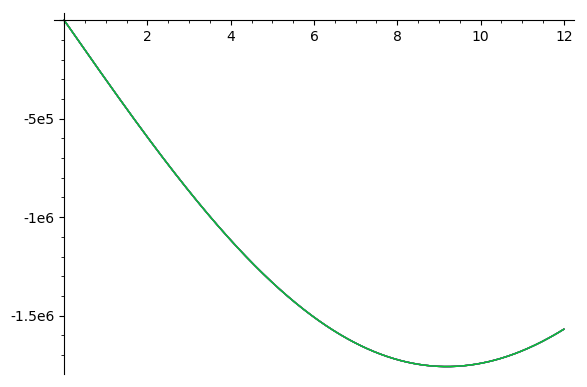

In [217]:
p = sage.plot.graphics.Graphics()

if E_mode:
    p += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    p += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
p.show ()

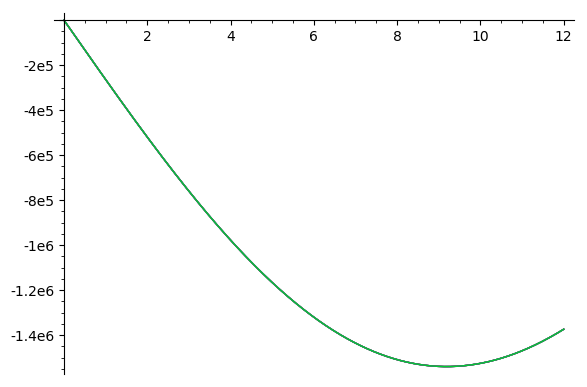

In [218]:
p = sage.plot.graphics.Graphics()

if E_mode:
    p += plot ([H_phi_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    p += plot ([H_phi_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
p.show ()

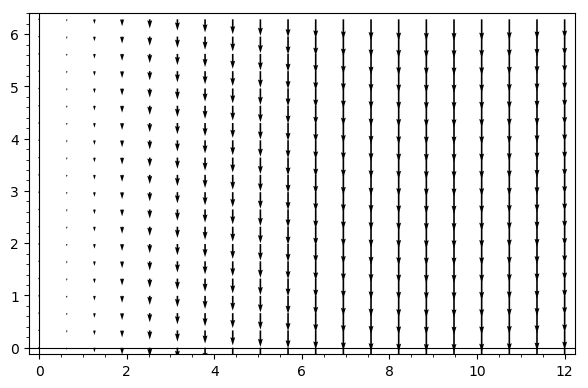

In [219]:
plot_vector_field((H_rho_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).imag_part(),
                   H_phi_sol[n_layers - 1](rh,ph,n_layers * h_sol,1).imag_part()),
                  (rh, 0, a_val), (ph, 0, 2*pi))


In [220]:
ESpolar.<rho,phi> = EuclideanSpace(coordinates='polar')
H1 = ESpolar.vector_field(
    H_rho_sol[n_layers - 1](rho,phi,n_layers * h_sol,1).imag_part(),
    H_phi_sol[n_layers - 1](rho,phi,n_layers * h_sol,1).imag_part(),
    name='H1')

print(H1.display())
#H1.plot()

H1 = (-421098.594818737*pi*real_part(bessel_J(1, 0.200402129807981*rho)) + 421098.594818737*pi*real_part(bessel_J(-1, 0.200402129807981*rho))) e_phi


In [221]:
def get_integrand_view(f):
    return f(x)

class my_dummy_integral:
    f = None
    a = None
    b = None
    def __init__(self, f, a, b):
        print ("my_dummy_integral ", f, a, b)
        self.f = f
        self.a = a
        self.b = b

def num_int(f, a, b):
    from scipy import integrate

    to_call_integration = True

    if type(f) is my_dummy_integral:
        to_call_integration = False

    import inspect
    stack = inspect.stack()
    for frame in stack:
        func_name = frame[3]
        # print ("func_name = ", func_name)
        if ('get_integrand_view' == func_name):
            to_call_integration = False
            break;

    if not to_call_integration:
        return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a = ", a)
        print ("b = ", b)

        raise ex

In [222]:
E2_8pi_rho_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_rho_s += [lambda rh,ph,z, i=i:" + str(
        ( (Re(E_rho_s[i](rh, ph, z))^2 +
           Im(E_rho_s[i](rh, ph, z))^2)) / (2*8*pi)
    ) + "]"))

In [223]:
E2_8pi_phi_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_phi_s += [lambda rh,ph,z,  i=i:" + str(
        ( (Re(E_phi_s[i](rh, ph, z))^2 +
           Re(E_phi_s[i](rh, ph, z))^2)) / (2*8*pi)
    ) + "]"))

In [224]:
E2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_z_s += [lambda rh,ph,z,  i=i:" + str(
        ( (Re(E_z_s[i](rh, ph, z))^2 +
           Im(E_z_s[i](rh, ph, z))^2)) / (2*8*pi)
    ) + "]"))

In [225]:
E2_8pi_rho_s[0](rh,ph,z)

1/64*A_z_0^2*k_0^2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))^2*sin(m*varphi + psi_m)^2*sin(k_0*z)^2/(pi*kappa^2)

In [226]:
E2_8pi_phi_s[0](rh,ph,z)

1/8*A_z_0^2*k_0^2*m^2*cos(m*varphi + psi_m)^2*real_part(bessel_J(m, kappa*rho))^2*sin(k_0*z)^2/(pi*kappa^4*rho^2)

In [227]:
if E_mode:
    print(E2_8pi_z_s[0](rh,ph,z))

1/16*(A_z_0^2*cos(k_0*z)^2*imag_part(bessel_J(m, kappa*rho))^2*sin(m*varphi + psi_m)^2 + A_z_0^2*cos(k_0*z)^2*real_part(bessel_J(m, kappa*rho))^2*sin(m*varphi + psi_m)^2)/pi


In [228]:
E2_8pi_rho_sol = []
for i in range(n_layers):
    E2_8pi_rho_sol += [lambda rh,ph,z, a0, i=i: E2_8pi_rho_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [229]:
E2_8pi_phi_sol = []
for i in range(n_layers):
    E2_8pi_phi_sol += [lambda rh,ph,z, a0, i=i: E2_8pi_phi_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [230]:
E2_8pi_z_sol = []
for i in range(n_layers):
    E2_8pi_z_sol += [lambda rh,ph,z, a0, i=i: E2_8pi_z_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [231]:
E2_8pi_rho_sol[0](rh,ph,z, a0)

2.34223923379081e10*a0^2*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho))^2*sin(245362.362944843*z)^2/pi

In [232]:
E2_8pi_phi_sol[0](rh,ph,z, a0)

0

In [233]:
if E_mode:
    print(E2_8pi_z_sol[0](rh,ph,z, a0))

1/16*(a0^2*cos(245362.362944843*z)^2*imag_part(bessel_J(0, 0.200402129807981*rho))^2 + a0^2*cos(245362.362944843*z)^2*real_part(bessel_J(0, 0.200402129807981*rho))^2)/pi


In [234]:
E2_8pi_rho_sol_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh += [lambda rh,ph,z, a0, i=i: E2_8pi_rho_sol[i](rh,ph,z, a0) * rh]

In [235]:
E2_8pi_phi_sol_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh += [lambda rh,ph,z, a0, i=i: E2_8pi_phi_sol[i](rh,ph,z, a0) * rh]

In [236]:
E2_8pi_z_sol_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh += [lambda rh,ph,z, a0, i=i: E2_8pi_z_sol[i](rh,ph,z, a0) * rh]

In [237]:
E2_8pi_rho_sol_rh[0](rh,ph,z,1)

2.34223923379081e10*rho*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho))^2*sin(245362.362944843*z)^2/pi

In [238]:
E2_8pi_phi_sol_rh[0](rh,ph,z,1)

0

In [239]:
if E_mode:
    print(E2_8pi_z_sol_rh[0](rh,ph,z,1))

1/16*(cos(245362.362944843*z)^2*imag_part(bessel_J(0, 0.200402129807981*rho))^2 + cos(245362.362944843*z)^2*real_part(bessel_J(0, 0.200402129807981*rho))^2)*rho/pi


In [240]:
E2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : E2_8pi_rho_sol_rh[i](rh,ph,z, a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [241]:
[E2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [0..12]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [242]:
[E2_8pi_rho_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [0..12]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [243]:
E2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : E2_8pi_phi_sol_rh[i](rh,ph,z, a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [244]:
[E2_8pi_phi_sol_rh_int_ph [0](rho,0, 1) for rho in [0..12]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [245]:
[E2_8pi_phi_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [0..12]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [246]:
E2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : E2_8pi_z_sol_rh[i](rh,ph,z, a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [247]:
if E_mode:
    print([E2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [0..12]])

[0.0, 0.1225087677698295, 0.23051541523366362, 0.31167057710130047, 0.3575988029838375, 0.3651082524965359, 0.33660439138192005, 0.27964714616607894, 0.20572418403295933, 0.12843454537859025, 0.06136775677932675, 0.016009620118422236, 2.4000954145859053e-31]


In [248]:
if E_mode:
    print([E2_8pi_z_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [0..12]])

[0.0, 0.44803061720659065, 0.8430250801053795, 1.1398201415769926, 1.307785682035431, 1.3352487229369379, 1.2310063677126504, 1.0227062583165216, 0.7523602989769692, 0.4697019624320212, 0.22442992813447316, 0.058549278663679656, 8.777463438143012e-31]


In [249]:
E2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : E2_8pi_rho_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [250]:
E2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : E2_8pi_phi_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [251]:
E2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : E2_8pi_z_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [252]:
f_dielectric_surf_rho = []
for i in range(n_layers - 1):
    f_dielectric_surf_rho += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_rho_sol_rh_int_ph_int_rh[i  ](0, a_val, (i+1) * h_sol, 1)]
    #f_dielectric_surf_rho += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_rho_sol_rh_int_ph_int_rh[i+1](0, a_val, (i+1) * h_sol, 1)]

In [253]:
f_dielectric_surf_phi = []
for i in range(n_layers - 1):
    f_dielectric_surf_phi += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_phi_sol_rh_int_ph_int_rh[i  ](0, a_val, (i+1) * h_sol, 1)]
    #f_dielectric_surf_phi += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_phi_sol_rh_int_ph_int_rh[i+1](0, a_val, (i+1) * h_sol, 1)]

In [254]:
if E_mode:
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1))
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, h, 1))

2.425627115477253
1.3817853135884373


In [255]:
if E_mode:
    print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, h_sol, 1))
    print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 1))

6.591060670034802
8.870836213960791


In [256]:
E2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [257]:
E2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [258]:
E2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [259]:
ED_8pi_rho_0 = epsilon[0].subs(digit_values) * E2_8pi_rho_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [260]:
ED_8pi_rho_1 = epsilon[1].subs(digit_values) * E2_8pi_rho_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [261]:
ED_8pi_rho_0 + ED_8pi_rho_1

3.07547182856800e8

In [262]:
ED_8pi_phi_0 = epsilon[0].subs(digit_values) * E2_8pi_phi_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [263]:
ED_8pi_phi_1 = epsilon[1].subs(digit_values) * E2_8pi_phi_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [264]:
ED_8pi_phi_0 + ED_8pi_phi_1

0.000000000000000

In [265]:
ED_8pi_z_0 = epsilon[0].subs(digit_values) * E2_8pi_z_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1) if E_mode else 0

In [266]:
ED_8pi_z_1 = epsilon[1].subs(digit_values) * E2_8pi_z_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1) if E_mode else 0

In [267]:
ED_8pi_z_0 + ED_8pi_z_1

0.000292933658664712

In [268]:
#ED_8pi_rho_0_10 = ED_8pi_rho_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 10)

In [269]:
#ED_8pi_rho_1_10 = ED_8pi_rho_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 10)

In [270]:
#ED_8pi_rho_0_10 + ED_8pi_rho_1_10

In [271]:
#ED_8pi_phi_0_10 = ED_8pi_phi_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 10)

In [272]:
#ED_8pi_phi_1_10 = ED_8pi_phi_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 10)

In [273]:
#ED_8pi_phi_0_10 + ED_8pi_phi_1_10

In [274]:
#ED_8pi_z_0_10 = ED_8pi_z_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 10) if E_mode else 0

In [275]:
#ED_8pi_z_1_10 = ED_8pi_z_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 10) if E_mode else 0

In [276]:
#ED_8pi_z_0_10 + ED_8pi_z_1_10

In [277]:
H2_8pi_rho_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_rho_s += [lambda rh,ph,z, i=i:" + str(
        (  Re(H_rho_s[i](rh, ph, z))^2 +
           Im(H_rho_s[i](rh, ph, z))^2 ) / (2*8*pi)
    ) + "]"))

In [278]:
H2_8pi_phi_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_phi_s += [lambda rh,ph,z,  i=i:" + str(
        (  Re(H_phi_s[i](rh, ph, z))^2 +
           Im(H_phi_s[i](rh, ph, z))^2 ) / (2*8*pi)
    ) + "]"))

In [279]:
H2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_z_s += [lambda rh,ph,z,  i=i:" + str(
        (  Re(H_z_s[i](rh, ph, z))^2 +
           Im(H_z_s[i](rh, ph, z))^2 ) / (2*8*pi)
    ) + "]"))

In [280]:
H2_8pi_rho_s[0](rh,ph,z)

1/16*(A_z_0^2*epsilon_0^2*m^2*omega^2*cos(m*varphi + psi_m)^2*cos(k_0*z)^2*imag_part(bessel_J(m, kappa*rho))^2/(c^2*kappa^4*rho^2) + A_z_0^2*epsilon_0^2*m^2*omega^2*cos(m*varphi + psi_m)^2*cos(k_0*z)^2*real_part(bessel_J(m, kappa*rho))^2/(c^2*kappa^4*rho^2))/pi

In [281]:
H2_8pi_phi_s[0](rh,ph,z)

1/64*A_z_0^2*epsilon_0^2*omega^2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))^2*cos(k_0*z)^2*sin(m*varphi + psi_m)^2/(pi*c^2*kappa^2)

In [282]:
H2_8pi_z_s[0](rh,ph,z)

0

In [283]:
H2_8pi_rho_sol = []
for i in range(n_layers):
    H2_8pi_rho_sol += [lambda rh,ph,z, a0, i=i: H2_8pi_rho_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [284]:
H2_8pi_phi_sol = []
for i in range(n_layers):
    H2_8pi_phi_sol += [lambda rh,ph,z, a0, i=i: H2_8pi_phi_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [285]:
H2_8pi_z_sol = []
for i in range(n_layers):
    H2_8pi_z_sol += [lambda rh,ph,z, a0, i=i: H2_8pi_z_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [286]:
H2_8pi_rho_sol[0](rh,ph,z, a0)

0

In [287]:
H2_8pi_phi_sol[0](rh,ph,z, a0)

1.44551238398130e10*pi*a0^2*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho))^2*cos(245362.362944843*z)^2

In [288]:
H2_8pi_z_sol[0](rh,ph,z, a0)

0

In [289]:
H2_8pi_rho_sol_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh += [lambda rh,ph,z, a0, i=i: H2_8pi_rho_sol[i](rh,ph,z, a0) * rh]

In [290]:
H2_8pi_phi_sol_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh += [lambda rh,ph,z, a0, i=i: H2_8pi_phi_sol[i](rh,ph,z, a0) * rh]

In [291]:
H2_8pi_z_sol_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh += [lambda rh,ph,z, a0, i=i: H2_8pi_z_sol[i](rh,ph,z, a0) * rh]

In [292]:
H2_8pi_rho_sol_rh[0](rh,ph,z,1)

0

In [293]:
H2_8pi_phi_sol_rh[0](rh,ph,z,1)

1.44551238398130e10*pi*rho*(bessel_J(1, 0.200402129807981*rho) - bessel_J(-1, 0.200402129807981*rho))^2*cos(245362.362944843*z)^2

In [294]:
H2_8pi_z_sol_rh[0](rh,ph,z,1)

0

In [295]:
H2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : H2_8pi_rho_sol_rh[i](rh,ph,z, a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [296]:
[H2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [297]:
[H2_8pi_rho_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [1..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [298]:
H2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : H2_8pi_phi_sol_rh[i](rh,ph,z, a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [299]:
[H2_8pi_phi_sol_rh_int_ph [0](rho,0, 1) for rho in [0..int(a_val)]]

[0.0,
 11344677177.914331,
 88053320260.7995,
 282472453016.8996,
 623174341545.1603,
 1108344874135.7593,
 1704508672671.1692,
 2350890656445.4614,
 2968764641215.8896,
 3474291567885.161,
 3792742761658.1333,
 3871738705528.278,
 3691257348349.756]

In [300]:
[H2_8pi_phi_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [0..int(a_val)]]

[0.0,
 8697970437.182106,
 67510530666.76747,
 216571790199.76328,
 477788121686.04486,
 849768644647.101,
 1306847767662.9656,
 1802429201830.2747,
 2276153536966.0156,
 2663741318831.594,
 2907898030008.4453,
 2968464265051.0317,
 2830089105971.3716]

In [301]:
H2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : H2_8pi_z_sol_rh[i](rh,ph,z, a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [302]:
[H2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [0..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [303]:
[H2_8pi_z_sol_rh_int_ph [1](rho,2*h_sol, 1) for rho in [0..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [304]:
H2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : H2_8pi_rho_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [305]:
H2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : H2_8pi_phi_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [306]:
H2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : H2_8pi_z_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [307]:
f_surf_0_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)

In [308]:
f_surf_0_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)

In [309]:
f_surf_0_z   = H2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)

In [310]:
f_surf_1_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 1)

In [311]:
f_surf_1_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 1)

In [312]:
f_surf_1_z   = H2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, 2*h_sol, 1)

In [313]:
surf_f_z = - (f_surf_0_rho + f_surf_0_phi + f_surf_0_z) + (f_surf_1_rho + f_surf_1_phi + f_surf_1_z)

In [314]:
surf_f_z

-5167009454270.301

In [315]:
f_dielectric_surf_rho

[5.16700982967116e12]

In [316]:
sum_surf_f_z = surf_f_z
for i in range(n_layers - 1):
    sum_surf_f_z += f_dielectric_surf_rho[i] + f_dielectric_surf_phi[i]

In [317]:
sum_surf_f_z

375400.856445312

In [318]:
H2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [319]:
H2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [320]:
H2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [321]:
H2_8pi_rho_0 = H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [322]:
H2_8pi_rho_1 = H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [323]:
H2_8pi_rho_0 + H2_8pi_rho_1

0.0

In [324]:
H2_8pi_phi_0 = H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [325]:
H2_8pi_phi_1 = H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [326]:
H2_8pi_phi_0 + H2_8pi_phi_1

307547180.93480855

In [327]:
H2_8pi_z_0 = H2_8pi_z_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [328]:
H2_8pi_z_1 = H2_8pi_z_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [329]:
H2_8pi_z_0 + H2_8pi_z_1

0.0

In [330]:
H2_8pi_phi_0 + H2_8pi_phi_1

307547180.93480855

In [331]:
ED_8pi_rho_0 + ED_8pi_rho_1

3.07547182856800e8

In [332]:
ED_8pi_z_0 + ED_8pi_z_1

0.000292933658664712

In [333]:
ED_8pi_rho_0 + ED_8pi_rho_1 + ED_8pi_z_0 + ED_8pi_z_1

3.07547182857093e8

In [334]:
field_energy = abs(H2_8pi_rho_0) + abs(H2_8pi_rho_1) + abs(H2_8pi_phi_0) + abs(H2_8pi_phi_1) + abs(H2_8pi_z_0) + abs(H2_8pi_z_1) \
             + abs(ED_8pi_rho_0) + abs(ED_8pi_rho_1) + abs(ED_8pi_phi_0) + abs(ED_8pi_phi_1) + abs(ED_8pi_z_0) + abs(ED_8pi_z_1)
field_energy

6.15094363791901e8

In [335]:
# E x H = (-E_z(rh, ph, z)*H_phi(rh, ph, z) + E_phi(rh, ph, z)*H_z(rh, ph, z)) e_rh 
#       + ( E_z(rh, ph, z)*H_rho(rh, ph, z) - E_rho(rh, ph, z)*H_z(rh, ph, z)) e_ph
#       + (E_rho(rh, ph, z)*H_phi(rh, ph, z) - E_phi(rh, ph, z)*H_rho(rh, ph, z)) e_z

In [336]:
# Abraham force
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh

#
# alpha = - omega * t
#

# f_z = (epsilon * mu - 1) / (4 * pi * c) * 
#       integrate(
#         (Re(-I*omega * E_rh * e^alpha) * Re(H_ph * e^alpha) - Re(-I*omega * E_ph * e^alpha) * Re(H_rh * e^alpha)) +
#         (Re(E_rh * e^alpha) * Re(-I*omega * H_ph * e^alpha) - Re(E_ph * e^alpha) * Re(-I*omega * H_rh * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_z = (epsilon * mu - 1) / (2 * 4 * pi * c) * (
#         (Re(-I*omega * E_rh) * Re(H_ph) + Im(-I*omega * E_rh) * Im(H_ph) 
#        - Re(-I*omega * E_ph) * Re(H_rh) - Im(-I*omega * E_ph) * Im(H_rh)) +
#         (Re(E_rh) * Re(-I*omega * H_ph) + Im(E_rh) * Im(-I*omega * H_ph)
#        - Re(E_ph) * Re(-I*omega * H_rh) - Im(E_ph) * Im(-I*omega * H_rh)) 
#       )


In [337]:
Abraham_f_z = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z += [lambda rh,ph,z,  i=i: " + str(
         (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho[i](rh, ph, z)) * Re(H_phi[i](rh, ph, z)) + Im(-I*omega * E_rho[i](rh, ph, z)) * Im(H_phi[i](rh, ph, z)) 
        - Re(-I*omega * E_phi[i](rh, ph, z)) * Re(H_rho[i](rh, ph, z)) - Im(-I*omega * E_phi[i](rh, ph, z)) * Im(H_rho[i](rh, ph, z)))
        +(Re(E_rho[i](rh, ph, z)) * Re(-I*omega * H_phi[i](rh, ph, z)) + Im(E_rho[i](rh, ph, z)) * Im(-I*omega * H_phi[i](rh, ph, z))
        - Re(E_phi[i](rh, ph, z)) * Re(-I*omega * H_rho[i](rh, ph, z)) - Im(E_phi[i](rh, ph, z)) * Im(-I*omega * H_rho[i](rh, ph, z))) 
        )
    ) + "]"))

In [338]:
display(Math(latex(Abraham_f_z[0](rh, ph, z))))

<IPython.core.display.Math object>

In [339]:
display(Math(latex(Abraham_f_z[1](rh, ph, z))))

<IPython.core.display.Math object>

In [340]:
Abraham_f_z_s = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z_s += [lambda rh,ph,z,  i=i: " + str(
        (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho_s[i](rh, ph, z)) * Re(H_phi_s[i](rh, ph, z)) + Im(-I*omega * E_rho_s[i](rh, ph, z)) * Im(H_phi_s[i](rh, ph, z)) 
        - Re(-I*omega * E_phi_s[i](rh, ph, z)) * Re(H_rho_s[i](rh, ph, z)) - Im(-I*omega * E_phi_s[i](rh, ph, z)) * Im(H_rho_s[i](rh, ph, z)))
        +(Re(E_rho_s[i](rh, ph, z)) * Re(-I*omega * H_phi_s[i](rh, ph, z)) + Im(E_rho_s[i](rh, ph, z)) * Im(-I*omega * H_phi_s[i](rh, ph, z))
        - Re(E_phi_s[i](rh, ph, z)) * Re(-I*omega * H_rho_s[i](rh, ph, z)) - Im(E_phi_s[i](rh, ph, z)) * Im(-I*omega * H_rho_s[i](rh, ph, z))) 
        )
    ) + "]"))

In [341]:
display(Math(latex(Abraham_f_z_s[0](rh, ph, z))))

<IPython.core.display.Math object>

In [342]:
display(Math(latex(Abraham_f_z_s[1](rh, ph, z))))

<IPython.core.display.Math object>

In [343]:
i = 0
display(Math(latex(
(Re(-I*omega * E_rho[i](rh, ph, z)) * Re(H_phi[i](rh, ph, z)) + Im(-I*omega * E_rho[i](rh, ph, z)) * Im(H_phi[i](rh, ph, z)) 
- Re(-I*omega * E_phi[i](rh, ph, z)) * Re(H_rho[i](rh, ph, z)) - Im(-I*omega * E_phi[i](rh, ph, z)) * Im(H_rho[i](rh, ph, z)))
+(Re(E_rho[i](rh, ph, z)) * Re(-I*omega * H_phi[i](rh, ph, z)) + Im(E_rho[i](rh, ph, z)) * Im(-I*omega * H_phi[i](rh, ph, z))
- Re(E_phi[i](rh, ph, z)) * Re(-I*omega * H_rho[i](rh, ph, z)) - Im(E_phi[i](rh, ph, z)) * Im(-I*omega * H_rho[i](rh, ph, z))) 
)))

<IPython.core.display.Math object>

In [344]:
Abraham_f_z_sol = []
for i in range(n_layers):
    Abraham_f_z_sol += [lambda rh,ph,z, a0, i=i: Abraham_f_z_s[i](rh,ph,z)
                  .subs(digit_values)
                  .subs(h == h_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                  .subs(psi_m == pi/2)
                 ]

In [345]:
#[Abraham_f_z_sol [0](rho,ph,z,a0) for rho in [0..int(a_val)]]

In [346]:
#[Abraham_f_z_sol [1](rho,ph,z,a0) for rho in [0..int(a_val)]]

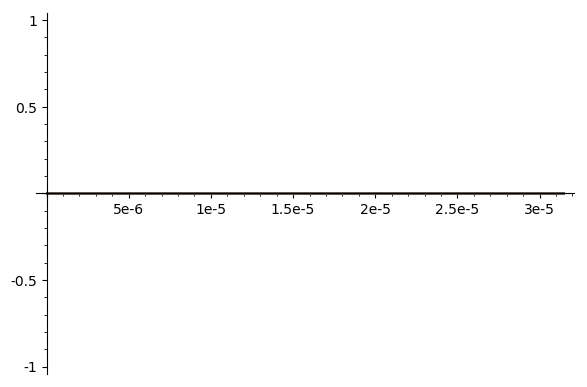

In [347]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([Abraham_f_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

In [348]:
Abraham_f_z_sol_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh += [lambda rh,ph,z, a0, i=i: Abraham_f_z_sol[i](rh,ph,z, a0) * rh]

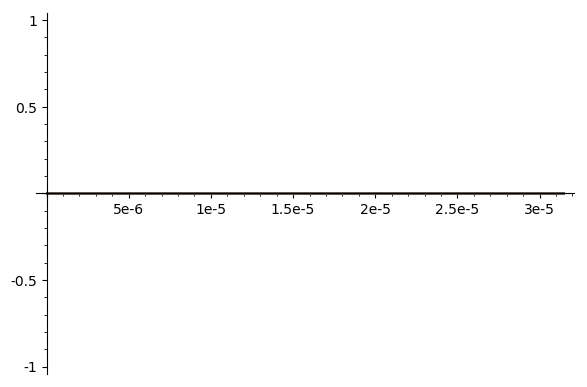

In [349]:
p = sage.plot.graphics.Graphics()

for i in range(n_layers):
    p += plot ([Abraham_f_z_sol_rh[i](rh,ph,z, 1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, i*h_sol, (i+1)*h_sol))
p.show ()

In [350]:
Abraham_f_z_sol_rh_int_ph = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph += [lambda rho, z, a0, i=i: 
                                  num_int(
                                      lambda x : Abraham_f_z_sol_rh[i](rh,ph,z,a0).subs(rh == rho, ph == x), 
                                      0, 2*pi)
                                 ]

In [351]:
#[Abraham_f_z_sol_rh_int_ph [0](rho,h_sol/2, 1) for rho in [1..int(a_val)
#                                                          ]]

In [352]:
Abraham_f_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda rh : Abraham_f_z_sol_rh_int_ph[i](rh,zz,a0),
                                             rh1, rh2)
                                        ]

In [353]:
#Abraham_f_z_sol_rh_int_ph_int_rh [0](0,a_val,h_sol/2, 1)

In [354]:
#[Abraham_f_z_sol_rh_int_ph_int_rh [0](0,a_val, z, 1) for z in [
#    0,        1*h_sol/10, 2*h_sol/10, 3*h_sol/10, 4*h_sol/10, 5*h_sol/10, 
#              6*h_sol/10, 7*h_sol/10, 8*h_sol/10, 9*h_sol/10, h_sol
#]]

In [355]:
#[Abraham_f_z_sol_rh_int_ph_int_rh [1](0,a_val, z, 1) for z in [
#    h_sol,    11*h_sol/10, 12*h_sol/10, 13*h_sol/10, 14*h_sol/10, 15*h_sol/10, 
#              16*h_sol/10, 17*h_sol/10, 18*h_sol/10, 19*h_sol/10, 2*h_sol
#]]

In [356]:
Abraham_f_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : Abraham_f_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [357]:
Abraham_f_z_0 = Abraham_f_z_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 1)

In [358]:
Abraham_f_z_1 = Abraham_f_z_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 1)

In [359]:
Abraham_f_z_0

0.0

In [360]:
Abraham_f_z_1

0.0

In [361]:
Abraham_f_z_0 + Abraham_f_z_1

0.0

In [362]:
#Abraham_f_z_0_10 = Abraham_f_z_sol_rh_int_ph_int_rh_int_z [0](0,a_val, 0, h_sol, 10)

In [363]:
#Abraham_f_z_1_10 = Abraham_f_z_sol_rh_int_ph_int_rh_int_z [1](0,a_val, h_sol, 2*h_sol, 10)

In [364]:
#Abraham_f_z_0_10

In [365]:
#Abraham_f_z_1_10

In [366]:
#Abraham_f_z_0_10 + Abraham_f_z_1_10

In [367]:
Abraham_f_z_0 + Abraham_f_z_1

0.0

In [368]:
sum_f_z = sum_surf_f_z + Abraham_f_z_0 + Abraham_f_z_1

In [369]:
sum_f_z

375400.856445312

In [370]:
#sum_f_z_10 = surf_f_z_10 + Abraham_f_z_0_10 + Abraham_f_z_1_10

In [371]:
#sum_f_z_10

In [372]:
sum_f_z / (field_energy)

0.000610314251834566

In [373]:
S = pi.n() * a_val^2
S

452.389342116930

In [374]:
V = n_layers * h_sol * S
V

0.0142231432585667

In [375]:
# мкм
h_sol*10*1000 

0.1572002469378513

In [376]:
field_energy

6.15094363791901e8

In [377]:
# эрг / куб см
(field_energy)/V

4.32460218258313e10

In [378]:
# волоконная оптика 1 мВт / 9 мкм
# 10^4 эрг в сек / 0.0009 см
w = (10^4 /(pi.n()*0.00045^2*c)).subs(c_value)
w # эрг в куб см

0.524329625568014

In [379]:
# дин
F_z = sum_f_z / (field_energy) * w
F_z

0.000320005843143241

In [380]:
# Ньютон
F_z / 10^5

3.20005843143241e-9

In [381]:
# gramm
F_z / 10^5 *101

3.23205901574673e-7

In [382]:
# Толщина серебряного слоя для всех зеркал должна быть не менее 0,15 мкм
# вес одной ячейки
m_of_Layer_gramm = V/2 * 3.95 + V/2 * 4.23 + V/2 * 10.49
m_of_Layer_gramm

0.132773042318720

In [383]:
omega_value[0].rhs().n()

2.98046134067856e15

In [384]:
# число ячеек в сантиметре
nLayers_per_sm = 1/(3*h_sol)
nLayers_per_sm

21204.37720846048

In [385]:
# вес сантиметрово
m_of_Layer_gramm * nLayers_per_sm / 1000

2.81536967244103

In [386]:
# кг / см толщины
1/(3*h_sol) * F_z / 10^5 *101/1000

6.85337985298992e-6